In [106]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

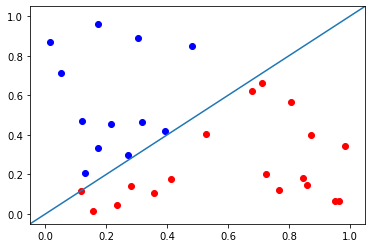

In [57]:
#The hyperplane will be the diagonal of the square unit
#going from bottom left to top right
w = [1/np.sqrt(2),-1/np.sqrt(2)]

#The dataset is made of 30 random point on R²
points = [np.random.rand(2) for _ in range(30)]
dataset = [[x,np.sign(np.dot(x,w))] for x in points]

class1 = []
class2 = []

for sample in dataset:
    if sample[1] == 1:
        class1.append(sample[0])
        
    if sample[1] == -1:
        class2.append(sample[0])

plt.scatter([x[0] for x in class1],[x[1] for x in class1], c ='red')
plt.scatter([x[0] for x in class2],[x[1] for x in class2], c ='blue')
plt.axline((0,0),(1,1))
plt.show()

In [102]:
#Applying the stochastic gradient descent
w_est = np.random.rand(2)

for i in range(1,1000000):
    n = np.random.randint(len(dataset))
    sample = dataset[n]
    x = sample[0]
    y = sample[1]
    
    grad = -2*np.dot(x.T,(y - np.dot(w_est.T,x)))
    grad /= np.linalg.norm(grad)
    w_est -= 1/i*grad

#we normalize w_est because we want to compare the directions
w_est /= np.linalg.norm(w_est)

print("The real w is :")
print(w)

print("\nThe estimated w is :")
print(w_est)

print("\nThe distance is :")
print(np.linalg.norm(w-w_est))
    
#w_est can approach w arbitrarily close but convergence is very slow

The real w is :
[0.7071067811865475, -0.7071067811865475]

The estimated w is :
[ 0.71439103 -0.69974671]

The distance is :
0.010355233816995036


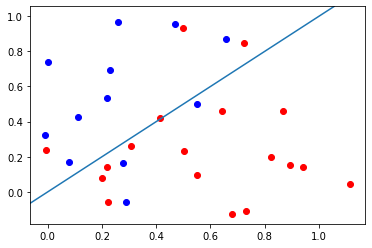

In [97]:
#Adding a slight gaussian noise
dataset_noise = [[np.array([sample[0][0] + np.random.normal(0,0.2),sample[0][1] + np.random.normal(0,0.2)]), sample[1]] for sample in dataset]

class1noise = []
class2noise = []

for sample in dataset_noise:
    if sample[1] == 1:
        class1noise.append(sample[0])
        
    if sample[1] == -1:
        class2noise.append(sample[0])

plt.scatter([x[0] for x in class1noise],[x[1] for x in class1noise], c ='red')
plt.scatter([x[0] for x in class2noise],[x[1] for x in class2noise], c ='blue')
plt.axline((0,0),(1,1))
plt.show()

In [105]:
#Applying the stochastic gradient descent on the noised dataset
w_est_noise = np.random.rand(2)

for i in range(1,1000000):
    n = np.random.randint(len(dataset_noise))
    sample = dataset_noise[n]
    x = sample[0]
    y = sample[1]
    
    grad = -2*np.dot(x.T,(y - np.dot(w_est_noise.T,x)))
    grad /= np.linalg.norm(grad)
    w_est_noise -= 1/i*grad

#we normalize w_est because we want to compare the directions
w_est_noise /= np.linalg.norm(w_est_noise)

print("The real w is :")
print(w)

print("\nThe estimated w is :")
print(w_est_noise)

print("\nThe distance is :")
print(np.linalg.norm(w-w_est_noise))
    
#The distance between w and w_est is still approximately the same, it varies
#a bit depending on what random samples are taken but as the gaussian noise
#is centered around 0 I guess the errors compensate themselves so it does not
#change much, and this effect likely decreases as the dataset size increases

The real w is :
[0.7071067811865475, -0.7071067811865475]

The estimated w is :
[ 0.71363668 -0.70051601]

The distance is :
0.00927781642957576


In [109]:
#For the breast cancer database
cancer_dataset = pd.read_csv("breast-cancer-wisconsin.data",names=["Sample code number","Clump Thickness","Uniformity of Cell Size","Uniformity of Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"])
display(cancer_dataset)

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


According to the given document, we have 65.5% of samples that are benign and 34.5% that are malignant so the classes are both correctly represented (else a dummy model would perform),

In [135]:
#Reworking a bit the dataset
#Dropping the ID
cancer_dataset_reworked = cancer_dataset.drop(columns=["Sample code number"])

#Dropping unknown values and converting string to integer
cancer_dataset_reworked = cancer_dataset_reworked.drop(cancer_dataset_reworked[cancer_dataset_reworked["Bare Nuclei"] == '?'].index)
cancer_dataset_reworked["Bare Nuclei"] = pd.to_numeric(cancer_dataset_reworked["Bare Nuclei"])

#Assigning 1 or -1 depending on the class
cancer_dataset_reworked["Class"] = cancer_dataset_reworked["Class"] - 3

display(cancer_dataset_reworked)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,-1
1,5,4,4,5,7,10,3,2,1,-1
2,3,1,1,1,2,2,3,1,1,-1
3,6,8,8,1,3,4,3,7,1,-1
4,4,1,1,3,2,1,3,1,1,-1
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,-1
695,2,1,1,1,2,1,1,1,1,-1
696,5,10,10,3,7,3,8,10,2,1
697,4,8,6,4,3,4,10,6,1,1


In [139]:
#Storing it into a numpy array
work_array = []

for row in cancer_dataset_reworked.itertuples():
    work_array.append([np.array([row[i] for i in range(1,10)]),row[10]])

In [151]:
#Applying the stochastic gradient descent on the new dataset
w_est_cancer = np.random.rand(9)

for i in range(1,1000000):
    n = np.random.randint(len(work_array))
    sample = work_array[n]
    x = sample[0]
    y = sample[1]
    
    grad = -2*np.dot(x.T,(y - np.dot(w_est_cancer.T,x)))
    grad /= np.linalg.norm(grad)
    w_est_cancer -= 1/i*grad

In [152]:
#Computing the empirical risk
risk = 0.0

for sample in work_array:
    x = sample[0]
    y = sample[1]
    
    risk += (y - np.dot(w_est_cancer.T,x))**2

risk /= len(cancer_dataset)

print(risk)

1.4110441442350214


The results are clearly not good, the method of the hyperplane separation may not work on this dataset. In the given document, they say that they used 3 different hyperplanes to achieve 95.9% accuracy.